In [81]:
import numpy as np
import pandas as pd
import sklearn

import seaborn as sns
import matplotlib.pyplot as plt


In [90]:
from sklearn.datasets import make_blobs

RANDOM_SEED = 32

np.random.seed(RANDOM_SEED)
NUM_HOUSES = 200
NUM_CLUSTERS_OF_HOUSES = 6
N_FEATURES = 2
CLUSTER_STD = 100.0
CENTER_BOX_FOR_HOUSES = (0,1000)
MEAN_DEMAND_WATER_PER_HOUSE = 100 # LITERS
VAR_DEMAND_WATER_PER_HOUSE = 50 # LITERS
MEAN_AREA_PER_HOUSE = 100 # METERS SQUARE
VAR_AREA_PER_HOUSE = 50 # METERS SQUARE PER HOUSE
RAINFALL_ESTIMATE = 100 # mm
house_data_x_y_labels = make_blobs(n_samples = NUM_HOUSES, centers = NUM_CLUSTERS_OF_HOUSES, n_features=N_FEATURES, cluster_std =CLUSTER_STD, center_box = CENTER_BOX_FOR_HOUSES, shuffle = True, random_state = RANDOM_SEED)

house_data_x_y = np.array(house_data_x_y_labels[0])
house_data_labels= np.array(house_data_x_y_labels[1])

house_data_x = house_data_x_y[:,0]
house_data_y = house_data_x_y[:,1]

# demand
demand_per_house = np.array([np.random.normal(loc = MEAN_DEMAND_WATER_PER_HOUSE, scale = VAR_DEMAND_WATER_PER_HOUSE) for i in range(NUM_HOUSES)])

#area
area_per_house = np.array([np.random.normal(loc = MEAN_AREA_PER_HOUSE, scale = VAR_AREA_PER_HOUSE) for i in range(NUM_HOUSES)])

# rainfall estimation
rainfall_estimate_for_city =  RAINFALL_ESTIMATE # FLOAT

# capacity of the tanks per house (DERIVED)
capacity_for_tank_per_house = np.array([area_per_house[i]* rainfall_estimate_for_city/1000  for i in range(NUM_HOUSES)])


In [92]:
print('House data x, y',(house_data_x_y).shape)
print('House_data_labels',(house_data_labels).shape )
print('House_data_x', (house_data_x.shape) )
print('House_data_y', (house_data_y.shape))
print('Demand_per_house', (demand_per_house.shape))
print('Capacity_for_tank_per_house', (capacity_for_tank_per_house.shape))


House data x, y (200, 2)
House_data_labels (200,)
House_data_x (200,)
House_data_y (200,)
Demand_per_house (200,)
Capacity_for_tank_per_house (200,)


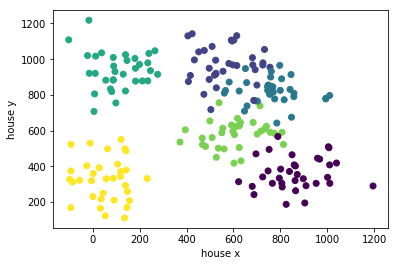

In [95]:
# sns.scatterplot(house_data_x, house_data_y, hue = house_data_labels)
plt.scatter(x= house_data_x, y= house_data_y, c = house_data_labels, )
plt.xlabel("house x")
plt.ylabel("house y")
plt.show()


# Data to csv for further coding

In [105]:
df = pd.DataFrame(data = None, columns = None)
df['house_data_x'] = house_data_x
df['house_data_y'] = house_data_y
df['demand_per_house'] = demand_per_house
df['area_per_house'] = area_per_house
df['capacity_for_tank_per_house'] = capacity_for_tank_per_house
df.round(2)
# df.head()

,house_data_x,house_data_y,demand_per_house,area_per_house,capacity_for_tank_per_house
0,503.71,717.78,82.56,134.39,13.44
1,-16.41,1218.14,149.19,136.87,13.69
2,234.72,878.91,129.05,43.96,4.40
3,871.94,354.18,103.51,102.75,10.28
4,87.19,332.71,138.88,228.42,22.84
5,509.14,1071.49,129.10,82.07,8.21
6,909.45,291.18,173.59,14.65,1.46
7,614.57,964.33,183.16,104.23,10.42
8,775.01,584.06,86.94,12.26,1.23
9,554.63,613.48,65.57,96.83,9.68


In [102]:
df.to_csv("data.csv", index= False, header=True)